In [2]:
'test'.upper()

'TEST'

In [3]:
'상장'.upper()

'상장'

In [19]:
while(True) :
    datatype = input("데이터를 선택하세요(상장/비상장/ALL) : ")
    print(f"데이터 선택 : {datatype.upper()}")
    if datatype.upper() in ('상장', '비상장', 'ALL') :
        break
    else :
        print("데이터를 잘못 선택했습니다. 다시 선택하세요.")

데이터 선택 : ALL


In [14]:
while(True) :
    f_select = input("피처 엔지니어링을 진행합니까?(1 : 네/ 2 : 아니오) : ")
    print(f"선택 : {f_select}")
    if f_select == '1' :
        print("피처 엔지니어링을 진행합니다.")
        break
    elif f_select == '2' :
        print("피처 엔지니어링을 진행하지 않습니다.")
        break
    else :
        print("숫자를 잘못 입력했습니다. 다시 입력하세요.")

선택 : 4
숫자를 잘못 입력했습니다. 다시 입력하세요.
선택 : 1
피처 엔지니어링을 진행합니다.


In [2]:
import pandas as pd
X = pd.read_csv('data/상장.csv')
X.shape[1]

85

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
X = pd.read_csv('data/비상장.csv')
X.drop(['회사명', '회계년도', '거래소코드', '산업코드', '산업명', 'label'], axis=1, inplace=True)
X = X.astype(np.float32)
X = X.sample(n = 50000)
# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 10 이상인 컬럼만 추출
high_vif_features = vif_data[vif_data["VIF"] >= 10]
print(high_vif_features)

            feature           VIF
1                자산  1.401164e+02
2             비유동자산  5.575314e+01
4              유동자산  3.388257e+01
7                자본  4.470261e+01
11            이익잉여금  1.071768e+01
12               부채  1.072109e+02
13            비유동부채  2.734205e+01
14            장기차입금  1.459116e+01
15             유동부채  4.478832e+01
16            단기차입금  1.125734e+01
17              매출액  6.747908e+01
18             매출원가  4.317250e+01
21             영업이익  2.372769e+01
25       법인세비용차감전손익  1.974642e+02
26            법인세비용  1.429865e+01
27            당기순이익  1.256604e+02
32              차입금  2.867480e+01
34            영업이익률  1.466156e+01
35             순이익률  1.362588e+01
36             부채비율  9.062125e+06
37           유동부채비율  2.837651e+05
38          비유동부채비율  4.569638e+06
50           매출액증가율  6.177274e+02
58          자기자본회전율  1.161686e+01
62             DSRI  1.706899e+09
64              AQI  6.512136e+08
65              SGI  5.792517e+02
70  Beneish M-Score  4.425803e+09


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 130813 to 37812
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   종업원                   50000 non-null  float32
 1   자산                    50000 non-null  float32
 2   비유동자산                 50000 non-null  float32
 3   유형자산                  50000 non-null  float32
 4   유동자산                  50000 non-null  float32
 5   재고자산                  50000 non-null  float32
 6   매출채권                  50000 non-null  float32
 7   자본                    50000 non-null  float32
 8   자본금                   50000 non-null  float32
 9   자본잉여금                 50000 non-null  float32
 10  기타포괄손익누계액             50000 non-null  float32
 11  이익잉여금                 50000 non-null  float32
 12  부채                    50000 non-null  float32
 13  비유동부채                 50000 non-null  float32
 14  장기차입금                 50000 non-null  float32
 15  유동부채               

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

df = pd.read_csv('data/ALL.csv')
drop_col = ['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label']
X = df.loc[df['회계년도'] <= '2017/12', : ].drop(drop_col,axis=1)
y = df.loc[df['회계년도'] <= '2017/12', 'label']
X = X.astype(np.float32)
X_sample = X.sample(n = 50000, random_state = 42)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X_sample.columns
vif_data["VIF"] = [variance_inflation_factor(X_sample.values, i) for i in range(X_sample.shape[1])]
# VIF 10 이상인 컬럼만 추출

high_vif_features = vif_data[vif_data["VIF"] >= 10]
print(high_vif_features)
X.drop(list(high_vif_features["feature"]), axis=1, inplace=True)

fs_est = LogisticRegression(
        solver="saga", penalty="elasticnet", l1_ratio=0.7,
        C=0.5, class_weight="balanced", max_iter=1000, n_jobs=-1, random_state=42
    )
fs_est.fit(X,y)

# SelectFromModel로 중요 피처 선택
selector = SelectFromModel(estimator=fs_est, prefit=True, threshold="median")
X_selected = selector.transform(X)

print("원본 피처 개수:", X_selected.shape[1])
print("선택된 피처 개수:", X_selected.shape[1])
print(f"최종 피처 목록 : {X_selected.columns}")

            feature           VIF
0                자산  9.875310e+02
1             비유동자산  4.741301e+02
2              유형자산  9.310744e+01
3              유동자산  2.068457e+02
4              재고자산  3.037090e+01
5              매출채권  2.067349e+01
6                자본  2.260389e+02
7               자본금  1.903487e+01
8             자본잉여금  1.432175e+01
10            이익잉여금  2.714165e+01
11               부채  4.654113e+02
12            비유동부채  8.146062e+01
14             유동부채  2.008503e+02
15            단기차입금  3.325469e+01
16              매출액  3.895869e+02
17             매출원가  2.100851e+02
18          판매비와관리비  3.183753e+01
20             영업이익  7.148106e+01
21            영업외수익  2.708120e+01
22            영업외비용  3.129069e+01
24       법인세비용차감전손익  1.134037e+02
25            법인세비용  2.967230e+01
26            당기순이익  4.033367e+01
27            기초자본금  2.065116e+01
28   영업활동으로 인한 현금흐름  2.615509e+01
29   투자활동으로 인한 현금흐름  3.770996e+01
32              차입금  1.518264e+01
35            영업이익률  1.523822e+01
36            

c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


원본 피처 개수: 17
선택된 피처 개수: 17


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [26]:
cols = X.columns[selector.get_support()]

In [27]:
X[cols]

,기타포괄손익누계액,장기차입금,감가상각비,이자보상배율,재무활동으로 인한 현금흐름,종업원,이자비용,매출총이익률,유동비율,금융비용부담률,자본유보율,자본잠식률,유형자산증가율,자기자본회전율,순운전자본회전율,유형자산회전율,매출채권회전율
0,3.187672e+09,0.000000e+00,1.975626e+09,9.510000,-1.527963e+10,845.0,1.302655e+09,45.148575,113.745789,0.897670,636.414429,-647.826904,0.000000,69.473297,1139.026245,94.046410,295.830963
1,2.112922e+09,1.850000e+10,1.848009e+09,4.220000,-1.591849e+09,845.0,2.444843e+09,43.569744,147.405624,1.135661,658.291992,-665.856689,-3.252093,101.836540,829.199890,141.824661,393.916840
2,2.020342e+09,1.000000e+10,1.158384e+09,14.580000,-1.982216e+10,845.0,1.757316e+09,46.013531,150.604446,0.749190,714.864136,-722.097351,26.124899,105.768394,560.847839,138.971909,390.557404
3,2.232570e+09,2.000000e+09,1.127475e+09,5.370000,-6.234498e+09,845.0,3.840261e+08,43.440544,159.132858,0.174367,705.537842,-713.530884,0.000000,96.923592,507.614990,128.119629,430.058777
4,1.770842e+09,0.000000e+00,9.569020e+08,33.650002,-3.955186e+09,845.0,2.316274e+08,44.597813,174.921951,0.108505,716.122253,-722.462219,-5.845275,93.432068,449.320953,127.920914,410.136688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178449,-3.352780e+08,0.000000e+00,0.000000e+00,0.000000,3.538137e+10,2.0,0.000000e+00,31.830473,376.905487,0.000000,97.094849,-55.769295,0.000000,149.545837,229.447144,465.941772,610.787720
178450,-4.489750e+08,1.832760e+08,1.606770e+08,41.720001,1.625270e+10,104.0,5.633440e+07,48.143700,657.043640,0.174382,4090.071289,-4502.377930,0.000000,47.102982,71.775978,200.585831,224.326035
178451,-5.903180e+08,7.063134e+09,2.628000e+08,-1.370000,2.797030e+10,104.0,5.092489e+08,43.294304,2018.011597,1.567598,3644.896484,-4118.414551,0.000000,46.634312,58.244495,106.187965,230.663910
178452,3.889900e+07,1.177828e+10,4.005190e+08,-33.340000,9.487057e+09,162.0,2.661033e+08,14.322242,237.905548,0.305390,1032.965088,-1033.696167,0.000000,144.429337,323.520172,247.926376,569.604980


In [25]:
df.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns

Index(['자산', '비유동자산', '유형자산', '유동자산', '재고자산', '매출채권', '자본', '자본금', '자본잉여금',
       '기타포괄손익누계액', '이익잉여금', '부채', '비유동부채', '장기차입금', '유동부채', '단기차입금', '매출액',
       '매출원가', '판매비와관리비', '감가상각비', '영업이익', '영업외수익', '영업외비용', '이자보상배율',
       '법인세비용차감전손익', '법인세비용', '당기순이익', '기초자본금', '영업활동으로 인한 현금흐름',
       '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '종업원', '차입금', '이자비용', '매출총이익률',
       '영업이익률', '순이익률', '부채비율', '유동부채비율', '비유동부채비율', '유동비율', '금융비용부담률',
       '자본유보율', '자본잠식률', 'ROE', 'ROA', 'ROIC', '매출액증가율', '영업이익증가율', '순이익증가율',
       '총자산증가율', '유동자산증가율', '유형자산증가율', '자기자본증가율', '총자산회전율', '자기자본회전율',
       '순운전자본회전율', '유형자산회전율', '매출채권회전율', '부채 대비 영업활동으로 인한 현금흐름',
       '부채 대비 투자활동으로 인한 현금흐름', '부채 대비 재무활동으로 인한 현금흐름', 'DSRI', 'GMI', 'AQI',
       'SGI', 'DEPI', 'SGAI', 'LVGI', 'TATA', 'Beneish M-Score'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9884 entries, 0 to 9883
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   회사명                   9884 non-null   object 
 1   거래소코드                 9884 non-null   int64  
 2   회계년도                  9884 non-null   object 
 3   자산                    9884 non-null   float64
 4   비유동자산                 9884 non-null   float64
 5   유형자산                  9884 non-null   float64
 6   유동자산                  9884 non-null   float64
 7   재고자산                  9884 non-null   float64
 8   매출채권                  9884 non-null   float64
 9   자본                    9884 non-null   float64
 10  자본금                   9884 non-null   int64  
 11  자본잉여금                 9884 non-null   float64
 12  기타포괄손익누계액             9884 non-null   float64
 13  이익잉여금                 9884 non-null   float64
 14  부채                    9884 non-null   float64
 15  비유동부채                

In [24]:
import pandas as pd
import numpy as np
import os
from common_prep import common_prep_run

while(True) :
    datatype = input("데이터를 선택하세요(상장/비상장/ALL) : ")
    datatype = datatype.upper()
    print(f"데이터 선택 : {datatype}")
    if datatype in ('상장', '비상장', 'ALL') :
        break
    else :
        print("데이터를 잘못 선택했습니다. 다시 선택하세요.")

path_dir = f"{datatype}"
df = pd.read_csv(f'data/{datatype}.csv')

while(True) :
    f_select = input("피처 엔지니어링을 진행합니까?(1 : 네/ 2 : 아니오/ 3 : 이미 진행했음) : ")
    print(f"선택 : {f_select}")
    if f_select == '1' :
        print("피처 엔지니어링을 진행합니다.")
        common_prep_run(datatype, df)
        X_train = pd.read_parquet(os.path.join(path_dir, "X_train.parquet"))
        X_test  = pd.read_parquet(os.path.join(path_dir, "X_test.parquet"))
        y_train = np.load(os.path.join(path_dir, "y_train.npy"))
        y_test  = np.load(os.path.join(path_dir, "y_test.npy"))
        break
    elif f_select == '2' :
        print("피처 엔지니어링을 진행하지 않습니다.")
        feature_cols = df.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns
        X_train = df.loc[df['회계년도'] <= '2017/12', feature_cols]
        y_train = df.loc[df['회계년도'] <= '2017/12', 'label']
        X_test = df.loc[df['회계년도'] > '2017/12', feature_cols]
        y_test = df.loc[df['회계년도'] > '2017/12', 'label']
        break
    elif  f_select == '3' :
        print("피처 엔지니어링이 이미 수행되어 있습니다.")
        X_train = pd.read_parquet(os.path.join(path_dir, "X_train.parquet"))
        X_test  = pd.read_parquet(os.path.join(path_dir, "X_test.parquet"))
        y_train = np.load(os.path.join(path_dir, "y_train.npy"))
        y_test  = np.load(os.path.join(path_dir, "y_test.npy"))        
        break
    else :
        print("숫자를 잘못 입력했습니다. 다시 입력하세요.")

데이터 선택 : 상장
선택 : 3
피처 엔지니어링이 이미 수행되어 있습니다.


In [25]:
X_train

,기타포괄손익누계액,감가상각비,이자보상배율,재무활동으로 인한 현금흐름,영업이익률,순이익률,유동비율,자본유보율,자본잠식률,ROE,ROIC,순이익증가율,자기자본회전율,순운전자본회전율,유형자산회전율,매출채권회전율,Marcap,Volume
index,,,,,,,,,,,,,,,,,,
0,3.187672e+09,1.975626e+09,9.51,-1.527963e+10,8.536841,4.629014,113.745787,636.414449,-647.826924,3.215929,4.021386,0.000000,69.473301,1139.026202,94.046406,295.830953,2.167996e+11,1.446450e+05
1,2.112922e+09,1.848009e+09,4.22,-1.591849e+09,4.792487,2.521006,147.405620,658.292005,-665.856670,2.567305,3.053196,-19.206744,101.836537,829.199885,141.824668,393.916841,1.544327e+11,9.919182e+04
2,2.020342e+09,1.158384e+09,14.58,-1.982216e+10,10.923196,7.537122,150.604446,714.864134,-722.097348,7.971893,8.394434,225.751773,105.768393,560.847866,138.971913,390.557392,1.330698e+11,1.448191e+05
3,2.232570e+09,1.127475e+09,5.37,-6.234498e+09,0.936349,0.459434,159.132863,705.537832,-713.530856,0.445300,0.469999,0.000000,96.923594,507.615000,128.119622,430.058787,1.708575e+11,8.200907e+04
4,1.770842e+09,9.569020e+08,33.65,-3.955186e+09,3.651185,2.312810,174.921957,716.122248,-722.462198,2.160906,2.302928,387.933607,93.432068,449.320950,127.920916,410.136703,1.538539e+11,8.541158e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,-3.352780e+08,0.000000e+00,0.00,3.538137e+10,29.476867,22.573960,376.905500,97.094848,-55.769297,33.758416,34.705179,0.000000,149.545830,229.447144,465.941775,610.787738,0.000000e+00,0.000000e+00
9880,-4.489750e+08,1.606770e+08,41.72,1.625270e+10,7.275236,5.818242,657.043633,4090.071300,-4502.378161,2.740565,3.075565,0.000000,47.102980,71.775977,200.585830,224.326031,3.110987e+11,5.287062e+05
9881,-5.903180e+08,2.628000e+08,-1.37,2.797030e+10,-2.147610,-3.544005,2018.011599,3644.896585,-4118.414575,-1.652722,-1.333021,0.000000,46.634312,58.244494,106.187968,230.663912,1.942580e+11,3.018978e+05


In [26]:
all = pd.read_csv('data/ALL.csv')

In [27]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178454 entries, 0 to 178453
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   회사명                   178454 non-null  object 
 1   거래소코드                 178454 non-null  int64  
 2   회계년도                  178454 non-null  object 
 3   자산                    178454 non-null  float64
 4   비유동자산                 178454 non-null  float64
 5   유형자산                  178454 non-null  float64
 6   유동자산                  178454 non-null  float64
 7   재고자산                  178454 non-null  float64
 8   매출채권                  178454 non-null  float64
 9   자본                    178454 non-null  float64
 10  자본금                   178454 non-null  float64
 11  자본잉여금                 178454 non-null  float64
 12  기타포괄손익누계액             178454 non-null  float64
 13  이익잉여금                 178454 non-null  float64
 14  부채                    178454 non-null  float64
 15  

In [32]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.array([[1,2],[3,4],[1,2],[3,4], [4,5], [1,3]])
y = np.array([0,0,1,1,0,1])

skf = StratifiedKFold(n_splits=2, shuffle=False)
print(skf.get_n_splits(X,y))   # -> 2

for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print("  Train indices:", train_idx)
    print("  Test  indices:", test_idx)

2
Fold 0:
  Train indices: [3 4 5]
  Test  indices: [0 1 2]
Fold 1:
  Train indices: [0 1 2]
  Test  indices: [3 4 5]


In [33]:
X_train

,기타포괄손익누계액,감가상각비,이자보상배율,재무활동으로 인한 현금흐름,영업이익률,순이익률,유동비율,자본유보율,자본잠식률,ROE,ROIC,순이익증가율,자기자본회전율,순운전자본회전율,유형자산회전율,매출채권회전율,Marcap,Volume
index,,,,,,,,,,,,,,,,,,
0,3.187672e+09,1.975626e+09,9.51,-1.527963e+10,8.536841,4.629014,113.745787,636.414449,-647.826924,3.215929,4.021386,0.000000,69.473301,1139.026202,94.046406,295.830953,2.167996e+11,1.446450e+05
1,2.112922e+09,1.848009e+09,4.22,-1.591849e+09,4.792487,2.521006,147.405620,658.292005,-665.856670,2.567305,3.053196,-19.206744,101.836537,829.199885,141.824668,393.916841,1.544327e+11,9.919182e+04
2,2.020342e+09,1.158384e+09,14.58,-1.982216e+10,10.923196,7.537122,150.604446,714.864134,-722.097348,7.971893,8.394434,225.751773,105.768393,560.847866,138.971913,390.557392,1.330698e+11,1.448191e+05
3,2.232570e+09,1.127475e+09,5.37,-6.234498e+09,0.936349,0.459434,159.132863,705.537832,-713.530856,0.445300,0.469999,0.000000,96.923594,507.615000,128.119622,430.058787,1.708575e+11,8.200907e+04
4,1.770842e+09,9.569020e+08,33.65,-3.955186e+09,3.651185,2.312810,174.921957,716.122248,-722.462198,2.160906,2.302928,387.933607,93.432068,449.320950,127.920916,410.136703,1.538539e+11,8.541158e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,-3.352780e+08,0.000000e+00,0.00,3.538137e+10,29.476867,22.573960,376.905500,97.094848,-55.769297,33.758416,34.705179,0.000000,149.545830,229.447144,465.941775,610.787738,0.000000e+00,0.000000e+00
9880,-4.489750e+08,1.606770e+08,41.72,1.625270e+10,7.275236,5.818242,657.043633,4090.071300,-4502.378161,2.740565,3.075565,0.000000,47.102980,71.775977,200.585830,224.326031,3.110987e+11,5.287062e+05
9881,-5.903180e+08,2.628000e+08,-1.37,2.797030e+10,-2.147610,-3.544005,2018.011599,3644.896585,-4118.414575,-1.652722,-1.333021,0.000000,46.634312,58.244494,106.187968,230.663912,1.942580e+11,3.018978e+05


In [34]:
import pandas as pd
df = pd.read_csv('data/상장.csv')

In [36]:
X_train = df.drop(['거래소코드'], axis=1).loc[df['회계년도'] <= '2017/12', : ]

In [43]:
X_train['거래소코드'] = df.loc[df['회계년도'] <= '2017/12','거래소코드']

In [45]:
!python -m pip install joblib

In [49]:
X_train.columns

Index(['회사명', '회계년도', '자산', '비유동자산', '유형자산', '유동자산', '재고자산', '매출채권', '자본',
       '자본금', '자본잉여금', '기타포괄손익누계액', '이익잉여금', '부채', '비유동부채', '장기차입금', '유동부채',
       '단기차입금', '매출액', '매출원가', '판매비와관리비', '감가상각비', '영업이익', '영업외수익', '영업외비용',
       '이자보상배율', '법인세비용차감전손익', '법인세비용', '당기순이익', '기초자본금', '영업활동으로 인한 현금흐름',
       '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '산업코드', '산업명', '종업원', '총차입금(원)',
       '이자비용', '매출총이익률', '영업이익률', '순이익률', '부채비율', '유동부채비율', '비유동부채비율', '유동비율',
       '금융비용부담률', '자본유보율', '자본잠식률', 'ROE', 'ROA', 'ROIC', '매출액증가율', '영업이익증가율',
       '순이익증가율', '총자산증가율', '유동자산증가율', '유형자산증가율', '자기자본증가율', '총자산회전율',
       '자기자본회전율', '순운전자본회전율', '유형자산회전율', '매출채권회전율', '부채 대비 영업활동으로 인한 현금흐름',
       '부채 대비 투자활동으로 인한 현금흐름', '부채 대비 재무활동으로 인한 현금흐름', 'DSRI', 'GMI', 'AQI',
       'SGI', 'DEPI', 'SGAI', 'LVGI', 'TATA', 'Beneish M-Score', 'Marcap',
       'Close', 'Open', 'High', 'Low', 'Volume', 'PER', 'PBR', 'label',
       '거래소코드'],
      dtype='object')

In [51]:
import joblib
from sklearn.model_selection import StratifiedKFold
import os
feature_cols = df.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns
X_train['거래소코드'] = df.loc[df['회계년도'] <= '2017/12', '거래소코드']
stf = StratifiedKFold(n_splits= 5, shuffle=False)
splits = list(stf.split(X_train[feature_cols], y_train, X_train['거래소코드'].values))
X_train.drop(['거래소코드'], axis=1, inplace=True)
joblib.dump(splits, os.path.join('data', "cv_splits.pkl"))

['data\\cv_splits.pkl']

In [2]:
import pandas as pd
df = pd.read_csv('data/상장.csv')
f_select = 'n'
feature_cols = df.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns
 
# 피처 셀렉션
if f_select == 'Y' :
    feature_cols = ['자산', '부채, 매출액']

print(feature_cols)

Index(['자산', '비유동자산', '유형자산', '유동자산', '재고자산', '매출채권', '자본', '자본금', '자본잉여금',
       '기타포괄손익누계액', '이익잉여금', '부채', '비유동부채', '장기차입금', '유동부채', '단기차입금', '매출액',
       '매출원가', '판매비와관리비', '감가상각비', '영업이익', '영업외수익', '영업외비용', '이자보상배율',
       '법인세비용차감전손익', '법인세비용', '당기순이익', '기초자본금', '영업활동으로 인한 현금흐름',
       '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '종업원', '총차입금(원)', '이자비용', '매출총이익률',
       '영업이익률', '순이익률', '부채비율', '유동부채비율', '비유동부채비율', '유동비율', '금융비용부담률',
       '자본유보율', '자본잠식률', 'ROE', 'ROA', 'ROIC', '매출액증가율', '영업이익증가율', '순이익증가율',
       '총자산증가율', '유동자산증가율', '유형자산증가율', '자기자본증가율', '총자산회전율', '자기자본회전율',
       '순운전자본회전율', '유형자산회전율', '매출채권회전율', '부채 대비 영업활동으로 인한 현금흐름',
       '부채 대비 투자활동으로 인한 현금흐름', '부채 대비 재무활동으로 인한 현금흐름', 'DSRI', 'GMI', 'AQI',
       'SGI', 'DEPI', 'SGAI', 'LVGI', 'TATA', 'Beneish M-Score', 'Marcap',
       'Close', 'Open', 'High', 'Low', 'Volume', 'PER', 'PBR'],
      dtype='object')


In [3]:
setting = {"데이터" : 'datatype', "피처 셀렉션" : 'f_select', "스케일링" : 'scale_select', "리샘플링" : 'resample'}
print(setting)

{'데이터': 'datatype', '피처 셀렉션': 'f_select', '스케일링': 'scale_select', '리샘플링': 'resample'}


In [4]:
!python -m pip install imblearn

In [5]:
df = pd.read_csv('data/상장.csv')
y = df['label']
y.reset_index(drop=True,inplace=True)

In [7]:
!python -m pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   - -------------------------------------- 3.9/102.5 MB 19.5 MB/s eta 0:00:06
   --- ------------------------------------ 9.2/102.5 MB 19.7 MB/s eta 0:00:05
   ----- ---------------------------------- 14.4/102.5 MB 20.1 MB/s eta 0:00:05
   -------- ------------------------------- 20.7/102.5 MB 22.2 MB/s eta 0:00:04
   ---------- ----------------------------- 27.0/102.5 MB 23.1 MB/s eta 0:00:04
   ------------- -------------------------- 33.8/102.5 MB 24.4 MB/s eta 0:00:03
   --------------- ------------------------ 40.6/102.5 MB 25.3 MB/s eta 0:00:03
   ------------------ --------------------- 47.4/102.5 MB 26.0 MB/s eta 0:00:03
   -------------------- ------------------- 53.7/102.5 MB 26.5 MB/s eta 0:00:02
   ------------------------ --------------- 62.9/102.5 MB 27.3 MB/s eta 0:00:02
   -------------------------- ------------- 67.1/102.5 MB 26.6 MB/s eta 0:00:02
   --------------------------- ------------ 71.0/10

In [8]:
!python -m pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.2/124.9 MB 24.5 MB/s eta 0:00:05
   -- ------------------------------------- 8.9/124.9 MB 20.5 MB/s eta 0:00:06
   ----- ---------------------------------- 16.3/124.9 MB 22.7 MB/s eta 0:00:05
   ------- -------------------------------- 22.8/124.9 MB 23.7 MB/s eta 0:00:05
   --------- ------------------------------ 28.8/124.9 MB 24.4 MB/s eta 0:00:04
   ----------- ---------------------------- 34.6/124.9 MB 24.7 MB/s eta 0:00:04
   ------------- -------------------------- 40.9/124.9 MB 25.3 MB/s eta 0:00:04
   -------------- ------------------------- 46.4/124.9 MB 25.2 MB/s eta 0:00:04
   ---------------- ----------------------- 51.1/124.9 MB 24.8 MB/s eta 0:00:03
   ----------------- ---------------------- 55.1/124.9 MB 24.2 MB/s eta 0:00:03
   ------------------- -------------------- 61.6/124.9 MB 24.7 MB/s eta 0:00:03
   --------------------- ------------------ 66.3/12

In [9]:
!python -m pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
exceptiongroup 1.3.0 requires typing-extensions>=4.6.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
selenium 4.27.1 requires typing_extensions~=4.9, but you have typing-extensions 4.5.0 which is incompatible.
sqlalchemy 2.0.41 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [ ]:
!python -m pip install pytorch

In [ ]:
!python -m pip install torch

In [ ]:
!python -m pip install shap

In [ ]:
!python -m pip install pytorch_tabnet

In [8]:
setting = {"1" : "dlf", "2" : "dl"} 
pilename = ''
for i in setting.values() :
    pilename += i
print(pilename)

dlfdl


In [4]:
import pandas as pd
import numpy as np
import os
path_dir = 'ALL'
X_train = pd.read_parquet(os.path.join(path_dir, "X_train.parquet"))
X_test  = pd.read_parquet(os.path.join(path_dir, "X_test.parquet"))
y_train = np.load(os.path.join(path_dir, "y_train.npy"))
y_test  = np.load(os.path.join(path_dir, "y_test.npy")) 

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

117418
117418
61036
61036


In [9]:
import pandas as pd
df = pd.read_csv('data/상장.csv')

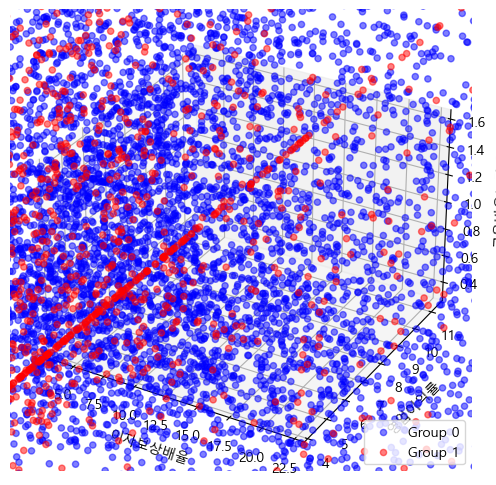

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows
plt.rcParams['axes.unicode_minus'] = False   

def plot_3d_scatter(X, y, features):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # 그룹 0 (파란색)
    ax.scatter(
        X.loc[y==0, features[0]],
        X.loc[y==0, features[1]],
        X.loc[y==0, features[2]],
        c='blue', label='Group 0', alpha=0.5, s= 20
    )

    # 그룹 1 (빨간색)
    ax.scatter(
        X.loc[y==1, features[0]],
        X.loc[y==1, features[1]],
        X.loc[y==1, features[2]],
        c='red', label='Group 1', alpha=0.5, s= 20
    )

    # 축 이름
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.set_xlim(X[features[0]].quantile(0.25), X[features[0]].quantile(0.75))
    ax.set_ylim(X[features[1]].quantile(0.25), X[features[1]].quantile(0.75))
    ax.set_zlim(X[features[2]].quantile(0.25), X[features[2]].quantile(0.75))
    ax.legend()
    plt.show()

plot_3d_scatter(df,df['label'], ['이자보상배율', '영업이익률', '금융비용부담률'])

In [15]:
df2 = pd.read_csv('data/비상장.csv')

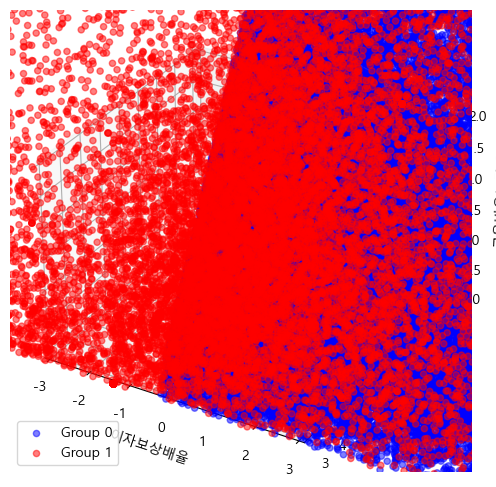

In [20]:
plot_3d_scatter(df2,df2['label'], ['이자보상배율', '영업이익률', '금융비용부담률'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9884 entries, 0 to 9883
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   회사명                   9884 non-null   object 
 1   거래소코드                 9884 non-null   int64  
 2   회계년도                  9884 non-null   object 
 3   자산                    9884 non-null   float64
 4   비유동자산                 9884 non-null   float64
 5   유형자산                  9884 non-null   float64
 6   유동자산                  9884 non-null   float64
 7   재고자산                  9884 non-null   float64
 8   매출채권                  9884 non-null   float64
 9   자본                    9884 non-null   float64
 10  자본금                   9884 non-null   int64  
 11  자본잉여금                 9884 non-null   float64
 12  기타포괄손익누계액             9884 non-null   float64
 13  이익잉여금                 9884 non-null   float64
 14  부채                    9884 non-null   float64
 15  비유동부채                

In [24]:
from scipy.stats import shapiro

for col in df.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns :
    stat, p = shapiro(df[col])
    if p > 0.05 :
        nomal = '만족'
    else :
        nomal = '불만족'
    print(f"{col} : p_value : {p}, 정규성 {nomal}")

c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


자산 : p_value : 0.0, 정규성 불만족
비유동자산 : p_value : 0.0, 정규성 불만족
유형자산 : p_value : 0.0, 정규성 불만족
유동자산 : p_value : 0.0, 정규성 불만족
재고자산 : p_value : 0.0, 정규성 불만족
매출채권 : p_value : 0.0, 정규성 불만족
자본 : p_value : 0.0, 정규성 불만족
자본금 : p_value : 0.0, 정규성 불만족
자본잉여금 : p_value : 0.0, 정규성 불만족
기타포괄손익누계액 : p_value : 0.0, 정규성 불만족
이익잉여금 : p_value : 0.0, 정규성 불만족
부채 : p_value : 0.0, 정규성 불만족
비유동부채 : p_value : 0.0, 정규성 불만족
장기차입금 : p_value : 0.0, 정규성 불만족
유동부채 : p_value : 0.0, 정규성 불만족
단기차입금 : p_value : 0.0, 정규성 불만족
매출액 : p_value : 0.0, 정규성 불만족
매출원가 : p_value : 0.0, 정규성 불만족
판매비와관리비 : p_value : 0.0, 정규성 불만족
감가상각비 : p_value : 0.0, 정규성 불만족
영업이익 : p_value : 0.0, 정규성 불만족
영업외수익 : p_value : 0.0, 정규성 불만족
영업외비용 : p_value : 0.0, 정규성 불만족
이자보상배율 : p_value : 0.0, 정규성 불만족
법인세비용차감전손익 : p_value : 0.0, 정규성 불만족
법인세비용 : p_value : 0.0, 정규성 불만족
당기순이익 : p_value : 0.0, 정규성 불만족
기초자본금 : p_value : 0.0, 정규성 불만족
영업활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
투자활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
재무활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
종업원 : p_value : 0.0,

In [26]:
for col in df2.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns :
    stat, p = shapiro(df2[col])
    if p > 0.05 :
        nomal = '만족'
    else :
        nomal = '불만족'
    print(f"{col} : p_value : {p}, 정규성 {nomal}")

c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


종업원 : p_value : 0.0, 정규성 불만족
자산 : p_value : 0.0, 정규성 불만족
비유동자산 : p_value : 0.0, 정규성 불만족
유형자산 : p_value : 0.0, 정규성 불만족
유동자산 : p_value : 0.0, 정규성 불만족
재고자산 : p_value : 0.0, 정규성 불만족
매출채권 : p_value : 0.0, 정규성 불만족
자본 : p_value : 0.0, 정규성 불만족
자본금 : p_value : 0.0, 정규성 불만족
자본잉여금 : p_value : 0.0, 정규성 불만족
기타포괄손익누계액 : p_value : 0.0, 정규성 불만족
이익잉여금 : p_value : 0.0, 정규성 불만족
부채 : p_value : 0.0, 정규성 불만족
비유동부채 : p_value : 0.0, 정규성 불만족
장기차입금 : p_value : 0.0, 정규성 불만족
유동부채 : p_value : 0.0, 정규성 불만족
단기차입금 : p_value : 0.0, 정규성 불만족
매출액 : p_value : 0.0, 정규성 불만족
매출원가 : p_value : 0.0, 정규성 불만족
판매비와관리비 : p_value : 0.0, 정규성 불만족
감가상각비 : p_value : 0.0, 정규성 불만족
영업이익 : p_value : 0.0, 정규성 불만족
영업외수익 : p_value : 0.0, 정규성 불만족
영업외비용 : p_value : 0.0, 정규성 불만족
이자비용 : p_value : 0.0, 정규성 불만족
법인세비용차감전손익 : p_value : 0.0, 정규성 불만족
법인세비용 : p_value : 0.0, 정규성 불만족
당기순이익 : p_value : 0.0, 정규성 불만족
기초자본금 : p_value : 0.0, 정규성 불만족
영업활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
투자활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
재무활동으로 인한 현금흐름 : p_value : 0.0, 정

In [27]:
df3 = pd.read_csv('data/ALL.csv')
for col in df3.drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1).columns :
    stat, p = shapiro(df3[col])
    if p > 0.05 :
        nomal = '만족'
    else :
        nomal = '불만족'
    print(f"{col} : p_value : {p}, 정규성 {nomal}")

c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


자산 : p_value : 0.0, 정규성 불만족
비유동자산 : p_value : 0.0, 정규성 불만족
유형자산 : p_value : 0.0, 정규성 불만족
유동자산 : p_value : 0.0, 정규성 불만족
재고자산 : p_value : 0.0, 정규성 불만족
매출채권 : p_value : 0.0, 정규성 불만족
자본 : p_value : 0.0, 정규성 불만족
자본금 : p_value : 0.0, 정규성 불만족
자본잉여금 : p_value : 0.0, 정규성 불만족
기타포괄손익누계액 : p_value : 0.0, 정규성 불만족
이익잉여금 : p_value : 0.0, 정규성 불만족
부채 : p_value : 0.0, 정규성 불만족
비유동부채 : p_value : 0.0, 정규성 불만족
장기차입금 : p_value : 0.0, 정규성 불만족
유동부채 : p_value : 0.0, 정규성 불만족
단기차입금 : p_value : 0.0, 정규성 불만족
매출액 : p_value : 0.0, 정규성 불만족
매출원가 : p_value : 0.0, 정규성 불만족
판매비와관리비 : p_value : 0.0, 정규성 불만족
감가상각비 : p_value : 0.0, 정규성 불만족
영업이익 : p_value : 0.0, 정규성 불만족
영업외수익 : p_value : 0.0, 정규성 불만족
영업외비용 : p_value : 0.0, 정규성 불만족
이자보상배율 : p_value : 0.0, 정규성 불만족
법인세비용차감전손익 : p_value : 0.0, 정규성 불만족
법인세비용 : p_value : 0.0, 정규성 불만족
당기순이익 : p_value : 0.0, 정규성 불만족
기초자본금 : p_value : 0.0, 정규성 불만족
영업활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
투자활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
재무활동으로 인한 현금흐름 : p_value : 0.0, 정규성 불만족
종업원 : p_value : 0.0,

In [28]:
df['자산'].describe()

count    9.884000e+03
mean     1.328826e+12
std      5.660245e+12
min      9.957488e+09
25%      6.692234e+10
50%      1.476419e+11
75%      4.338559e+11
max      4.955700e+13
Name: 자산, dtype: float64

In [ ]:
from scipy.stats import boxcox, yeojohnson
import pandas as pd

transformed, lambda_ = boxcox(df['자산'])
pd.Series(transformed).describe()

count    9884.000000
mean        4.392573
std         0.003912
min         4.381603
25%         4.389917
50%         4.392443
75%         4.395230
max         4.401854
dtype: float64

In [32]:
stat, p = shapiro(transformed)
if p > 0.05 :
    print("정규성 만족")
else :
    print("정규성 불만족")

정규성 불만족


c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


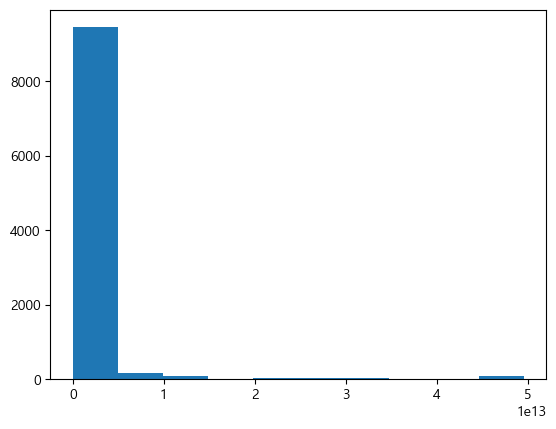

In [36]:
plt.hist(df['자산'])
plt.show()

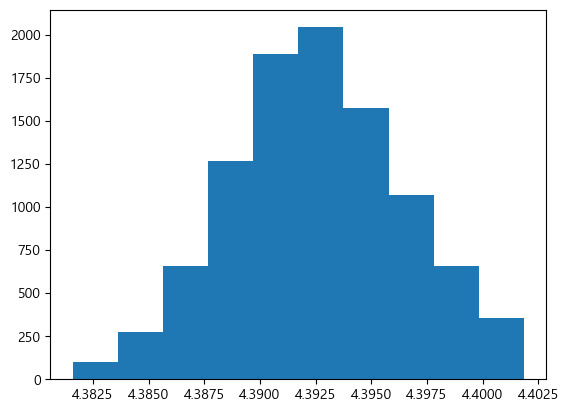

In [35]:
plt.hist(transformed)
plt.show()

In [37]:
from scipy.stats import yeojohnson

In [40]:
data = pd.DataFrame()
for col in ['이자보상배율', '영업이익률', '금융비용부담률'] :
    transformed_data, lambda_ = yeojohnson(df[col])
    data[col] = transformed_data

In [42]:
data['label'] = df['label']

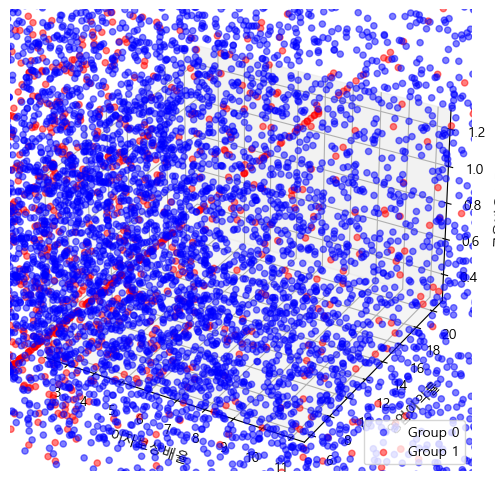

In [45]:
plot_3d_scatter(data,data['label'], ['이자보상배율', '영업이익률', '금융비용부담률'])

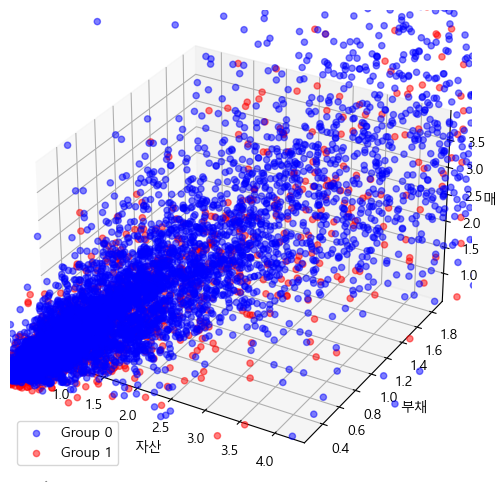

In [48]:
plot_3d_scatter(df,df['label'], ['자산', '부채', '매출액'])

In [49]:
for col in data.drop('label', axis=1).columns :
    stat, p = shapiro(data[col])
    if p > 0.05 :
        print(f"{col} 정규성 만족")
    else :
        print(f"{col} 정규성 불만족")

이자보상배율 정규성 불만족
영업이익률 정규성 불만족
금융비용부담률 정규성 불만족


c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9884 entries, 0 to 9883
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   회사명                   9884 non-null   object 
 1   거래소코드                 9884 non-null   int64  
 2   회계년도                  9884 non-null   object 
 3   자산                    9884 non-null   float64
 4   비유동자산                 9884 non-null   float64
 5   유형자산                  9884 non-null   float64
 6   유동자산                  9884 non-null   float64
 7   재고자산                  9884 non-null   float64
 8   매출채권                  9884 non-null   float64
 9   자본                    9884 non-null   float64
 10  자본금                   9884 non-null   int64  
 11  자본잉여금                 9884 non-null   float64
 12  기타포괄손익누계액             9884 non-null   float64
 13  이익잉여금                 9884 non-null   float64
 14  부채                    9884 non-null   float64
 15  비유동부채                

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(['회사명', '회계년도', '거래소코드', '산업코드', '산업명', 'label'], axis=1)
y = df['label']

# 1) 표준화
X_scaled = StandardScaler().fit_transform(X)

# 2) PCA (모든 주성분 사용)
pca = PCA(n_components=3)
pca.fit(X_scaled)

# 3) 각 피처의 전체 주성분 기여도 계산 (절댓값 합)
feature_importance = np.abs(pca.components_).sum(axis=0)

# 4) 피처별 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

# 5) 중요도 기준 내림차순 정렬
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 6) 출력
print("피처 중요도 순서:")
print(importance_df)

피처 중요도 순서:
            feature  importance
71           Marcap    6.379118
19            감가상각비    6.300153
43            자본잠식률    6.141564
31              종업원    6.134009
18          판매비와관리비    6.055572
..              ...         ...
49           순이익증가율    2.463136
62             DSRI    2.448658
70  Beneish M-Score    2.439954
56         순운전자본회전율    2.105826
23           이자보상배율    1.782751

[79 rows x 2 columns]


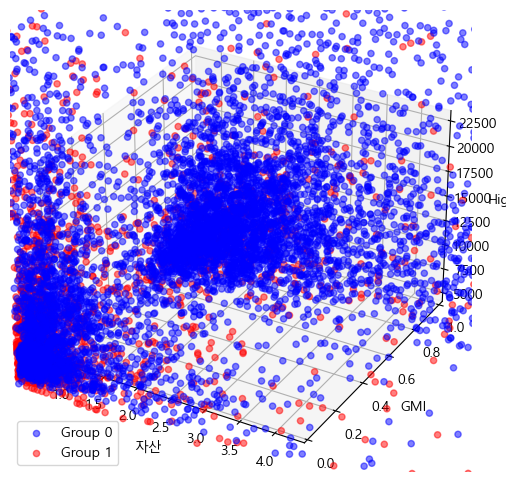

In [59]:
plot_3d_scatter(df,df['label'], ['자산', 'GMI', 'High'])

In [60]:
data = pd.DataFrame()
for col in ['자산', 'GMI', 'High'] :
    transformed_data, lambda_ = yeojohnson(df[col])
    data[col] = transformed_data

In [61]:
data['label'] = df['label']

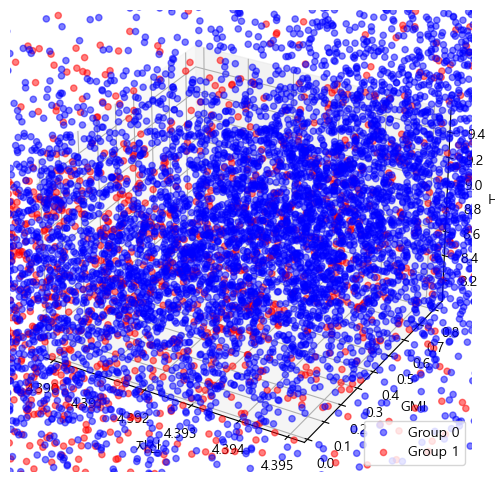

In [63]:
plot_3d_scatter(data,data['label'], ['자산', 'GMI', 'High'])

In [58]:
X = df.drop(['회사명', '회계년도', '거래소코드', '산업코드', '산업명', 'label'], axis=1)
pca = PCA(n_components=2)  # 2개의 주성분으로 축소
X_pca = pca.fit_transform(X)

print("변환된 데이터 (2차원):\n", X_pca)
print("설명된 분산 비율:", pca.explained_variance_ratio_)
print("주성분 벡터(components_):\n", pca.components_)

변환된 데이터 (2차원):
 [[-2.05719006e+12  8.79931605e+11]
 [-2.05973806e+12  7.89541319e+11]
 [-2.05228116e+12  7.49664132e+11]
 ...
 [-2.29758460e+12  1.11738928e+12]
 [-2.31034301e+12  1.07428099e+12]
 [-3.66534447e+10  3.05524375e+12]]
설명된 분산 비율: [0.74767118 0.22797079]
주성분 벡터(components_):
 [[ 3.45968973e-01  2.07805423e-01  1.29510471e-01  1.16784952e-01
   3.07807955e-02  3.30551333e-02  1.45535423e-01  6.16985000e-03
   2.81459286e-02  1.17464926e-03  8.57755900e-02  2.11269057e-01
   7.87393949e-02  1.24825651e-02  1.02394122e-01  2.28991876e-02
   2.91994013e-01  2.36169166e-01  4.18327290e-02  2.00734548e-03
   1.84606749e-02  7.65618832e-03  9.69989988e-03 -4.80498355e-11
   1.68192996e-02  4.09756631e-03  1.27732441e-02  6.18280171e-03
   2.70771738e-02 -2.95980755e-02 -4.01002323e-04  4.43963041e-10
   7.23322653e-02  3.42028261e-03  1.18819129e-15  2.86335599e-14
   5.15903192e-14  5.82702184e-13  8.48971762e-14  3.28308793e-13
  -1.08124535e-12 -3.39041922e-15  6.80218058e-11 -

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# X = 타겟 제외한 입력 피처들
X = df.drop(columns=["label", "회계년도", "거래소코드","산업코드","산업명","회사명"])

# 2. PCA 수행 (주요 3개 성분만 뽑는다고 가정)
pca = PCA(n_components=3, random_state=42)
pca.fit(X)

# 3. 로딩(가중치) 확인
loadings = pd.DataFrame(
    pca.components_.T,          # (피처 x 주성분)
    index=X.columns,
    columns=['PC1','PC2','PC3']
)

# 4. 주성분별 기여도 큰 피처 Top 5 뽑기
for pc in loadings.columns:
    print(f"\n{pc} 상위 기여 피처:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


PC1 상위 기여 피처:
Marcap    0.750109
자산        0.345969
매출액       0.291994
매출원가      0.236169
부채        0.211269
Name: PC1, dtype: float64

PC2 상위 기여 피처:
Marcap    0.660761
자산        0.398985
매출액       0.326623
매출원가      0.255243
부채        0.249172
Name: PC2, dtype: float64

PC3 상위 기여 피처:
매출원가     0.663764
비유동자산    0.364356
매출액      0.353454
자산       0.312190
자본       0.231065
Name: PC3, dtype: float64


In [70]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'], index=df.index)
X_pca_df['label'] = df['label']

c:\Users\rlaal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


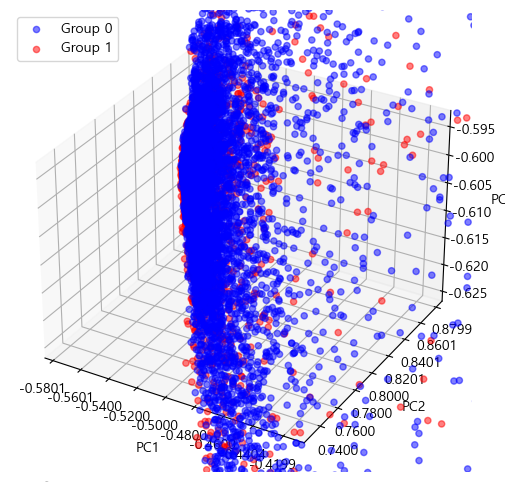

In [71]:
plot_3d_scatter(X_pca_df,X_pca_df['label'], ['PC1','PC2','PC3'])

In [75]:
group0 = df.loc[df['label'] == 0, : ].drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1)
group1 = df.loc[df['label'] == 1, : ].drop(['회사명', '거래소코드', '회계년도', '산업코드', '산업명', 'label'], axis=1)

In [76]:
from scipy.stats import mannwhitneyu
for col in group0.columns :
    stat, p = mannwhitneyu(group0[col], group1[col], alternative='two-sided')
    print('통계량=%.3f, p-value=%.3f' % (stat, p))

    if p < 0.05:
        print(f"{col} 유의미한 차이가 있습니다.")
    else:
        print(f"{col} 유의미한 차이가 없습니다.")

통계량=10119216.000, p-value=0.000
자산 유의미한 차이가 있습니다.
통계량=10017554.000, p-value=0.000
비유동자산 유의미한 차이가 있습니다.
통계량=10087835.500, p-value=0.000
유형자산 유의미한 차이가 있습니다.
통계량=10032666.500, p-value=0.000
유동자산 유의미한 차이가 있습니다.
통계량=9644939.000, p-value=0.000
재고자산 유의미한 차이가 있습니다.
통계량=10129325.000, p-value=0.000
매출채권 유의미한 차이가 있습니다.
통계량=10415006.500, p-value=0.000
자본 유의미한 차이가 있습니다.
통계량=9228615.500, p-value=0.000
자본금 유의미한 차이가 있습니다.
통계량=8064433.500, p-value=0.008
자본잉여금 유의미한 차이가 있습니다.
통계량=8078965.000, p-value=0.005
기타포괄손익누계액 유의미한 차이가 있습니다.
통계량=11583136.500, p-value=0.000
이익잉여금 유의미한 차이가 있습니다.
통계량=9571713.000, p-value=0.000
부채 유의미한 차이가 있습니다.
통계량=9055853.000, p-value=0.000
비유동부채 유의미한 차이가 있습니다.
통계량=8652040.000, p-value=0.000
장기차입금 유의미한 차이가 있습니다.
통계량=9731809.500, p-value=0.000
유동부채 유의미한 차이가 있습니다.
통계량=8866964.500, p-value=0.000
단기차입금 유의미한 차이가 있습니다.
통계량=10548000.500, p-value=0.000
매출액 유의미한 차이가 있습니다.
통계량=10127821.500, p-value=0.000
매출원가 유의미한 차이가 있습니다.
통계량=9700357.500, p-value=0.000
판매비와관리비 유의미한 차이가 있습니다.
통계량=9454331.500,

In [77]:
data = pd.DataFrame(index=df.index)
for col in df.drop(['회사명', '회계년도', '거래소코드', '산업코드', '산업명', 'label'], axis=1).columns :
    transformed_data, lambda_ = yeojohnson(df[col])
    data[col] = transformed_data

In [79]:
data['label'] = df['label']

In [ ]:
from sklearn.decomposition import PCA

# X = 타겟 제외한 입력 피처들
X = data.drop(columns=["label"])

# 2. PCA 수행 (주요 3개 성분만 뽑는다고 가정)
pca = PCA(n_components=5, random_state=42)
pca.fit(X)

# 3. 로딩(가중치) 확인
loadings = pd.DataFrame(
    pca.components_.T,          # (피처 x 주성분)
    index=X.columns,
    columns=['PC1','PC2','PC3', 'PC4', 'PC5']
)

# 4. 주성분별 기여도 큰 피처 Top 5 뽑기
for pc in loadings.columns:
    print(f"\n{pc} 상위 기여 피처:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


PC1 상위 기여 피처:
이익잉여금             0.784577
법인세비용차감전손익        0.298904
영업활동으로 인한 현금흐름    0.282918
투자활동으로 인한 현금흐름    0.261926
당기순이익             0.253645
Name: PC1, dtype: float64

PC2 상위 기여 피처:
재무활동으로 인한 현금흐름    0.963956
영업활동으로 인한 현금흐름    0.193299
투자활동으로 인한 현금흐름    0.159730
이익잉여금             0.055600
자본                0.039735
Name: PC2, dtype: float64

PC3 상위 기여 피처:
영업활동으로 인한 현금흐름    0.590095
이익잉여금             0.568933
투자활동으로 인한 현금흐름    0.426944
법인세비용차감전손익        0.266283
당기순이익             0.220065
Name: PC3, dtype: float64

PC4 상위 기여 피처:
법인세비용차감전손익        0.602574
당기순이익             0.542344
영업활동으로 인한 현금흐름    0.439290
투자활동으로 인한 현금흐름    0.307681
이익잉여금             0.170664
Name: PC4, dtype: float64

PC5 상위 기여 피처:
투자활동으로 인한 현금흐름    0.703933
영업활동으로 인한 현금흐름    0.534488
기타포괄손익누계액         0.386363
재무활동으로 인한 현금흐름    0.208584
자본                0.102049
Name: PC5, dtype: float64


In [83]:
X_pca = pca.transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3', 'PC4', 'PC5'], index=df.index)
X_pca_df['label'] = df['label']

In [85]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1} 설명 분산 비율: {ratio:.2%}")

PC1 설명 분산 비율: 67.52%
PC2 설명 분산 비율: 18.47%
PC3 설명 분산 비율: 5.87%
PC4 설명 분산 비율: 3.68%
PC5 설명 분산 비율: 1.71%


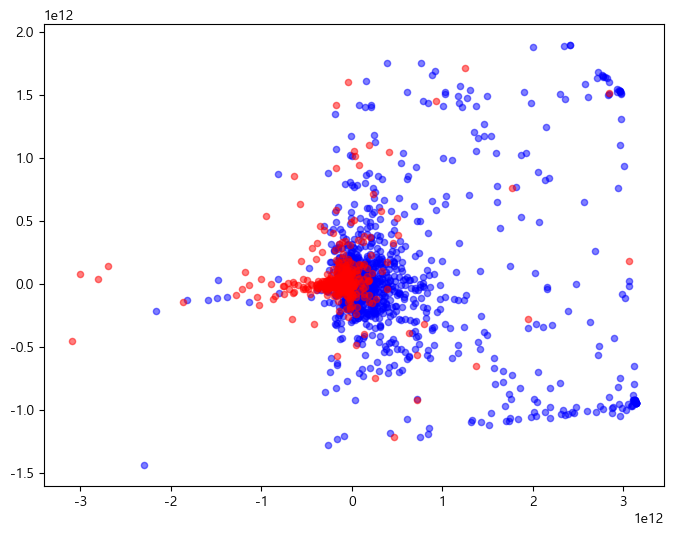

In [91]:
fig = plt.figure(figsize=(8, 6))

# 그룹 0 (파란색)
plt.scatter(
    X_pca_df.loc[X_pca_df['label']==0, 'PC1'],
    X_pca_df.loc[X_pca_df['label']==0, 'PC2'],
    c='blue', label='Group 0', alpha=0.5, s= 20
)

# 그룹 1 (빨간색)
plt.scatter(
    X_pca_df.loc[X_pca_df['label']==1, 'PC1'],
    X_pca_df.loc[X_pca_df['label']==1, 'PC2'],
    c='red', label='Group 1', alpha=0.5, s= 20
)

# 축 이름

plt.show()

In [93]:
from sklearn.decomposition import SparsePCA
X = data.drop(columns=["label"])
# n_components=5, 각 PC에서 최대 3개 피처만 사용하도록 제한
spca = SparsePCA(n_components=5, alpha=1, random_state=42)
spca.fit(X)

# 로딩 확인
sparse_loadings = pd.DataFrame(
    spca.components_.T,
    index=X.columns,
    columns=['PC1','PC2','PC3','PC4','PC5']
)

# 4. 주성분별 기여도 큰 피처 Top 5 뽑기
for pc in sparse_loadings.columns:
    print(f"\n{pc} 상위 기여 피처:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


PC1 상위 기여 피처:
이익잉여금             0.784577
법인세비용차감전손익        0.298904
영업활동으로 인한 현금흐름    0.282918
투자활동으로 인한 현금흐름    0.261926
당기순이익             0.253645
Name: PC1, dtype: float64

PC2 상위 기여 피처:
재무활동으로 인한 현금흐름    0.963956
영업활동으로 인한 현금흐름    0.193299
투자활동으로 인한 현금흐름    0.159730
이익잉여금             0.055600
자본                0.039735
Name: PC2, dtype: float64

PC3 상위 기여 피처:
영업활동으로 인한 현금흐름    0.590095
이익잉여금             0.568933
투자활동으로 인한 현금흐름    0.426944
법인세비용차감전손익        0.266283
당기순이익             0.220065
Name: PC3, dtype: float64

PC4 상위 기여 피처:
법인세비용차감전손익        0.602574
당기순이익             0.542344
영업활동으로 인한 현금흐름    0.439290
투자활동으로 인한 현금흐름    0.307681
이익잉여금             0.170664
Name: PC4, dtype: float64

PC5 상위 기여 피처:
투자활동으로 인한 현금흐름    0.703933
영업활동으로 인한 현금흐름    0.534488
기타포괄손익누계액         0.386363
재무활동으로 인한 현금흐름    0.208584
자본                0.102049
Name: PC5, dtype: float64


In [ ]:
X_spca = spca.transform(X)
X_spca_df = pd.DataFrame(X_spca, columns=['PC1','PC2','PC3', 'PC4', 'PC5'], index=df.index)
X_spca_df['label'] = df['label']

In [94]:
import pandas as pd
from sklearn.decomposition import SparsePCA

# 1. Sparse PCA 수행
n_components = 5   # 주성분 개수
max_features_per_pc = 3  # 각 PC에서 사용할 최대 피처 수
X = data.drop(columns=["label"])
spca = SparsePCA(n_components=n_components, alpha=1, random_state=42)
spca.fit(X)

# 2. 로딩 확인 (피처 x PC)
sparse_loadings = pd.DataFrame(
    spca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# 3. 절대값 기준으로 상위 피처 선택 (중복 방지)
selected_features = set()
top_features_per_pc = {}

for pc in sparse_loadings.columns:
    # 남은 피처만 고려
    remaining_features = sparse_loadings.index.difference(selected_features)
    # 남은 피처 중 절대값 기준 상위 N개 선택
    top_features = sparse_loadings.loc[remaining_features, pc].abs().sort_values(ascending=False).head(max_features_per_pc).index.tolist()
    top_features_per_pc[pc] = top_features
    selected_features.update(top_features)

# 4. 결과 확인
top_features_per_pc

{'PC1': ['이익잉여금', '법인세비용차감전손익', '영업활동으로 인한 현금흐름'],
 'PC2': ['재무활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '자본'],
 'PC3': ['당기순이익', '영업이익', '법인세비용'],
 'PC4': ['기타포괄손익누계액', '이자비용', '순운전자본회전율'],
 'PC5': ['자본유보율', '자본잠식률', '부채비율']}

In [95]:
# 4. 주성분별 기여도 큰 피처 Top 5 뽑기
for pc in sparse_loadings.columns:
    print(f"\n{pc} 상위 기여 피처:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


PC1 상위 기여 피처:
이익잉여금             0.784577
법인세비용차감전손익        0.298904
영업활동으로 인한 현금흐름    0.282918
투자활동으로 인한 현금흐름    0.261926
당기순이익             0.253645
Name: PC1, dtype: float64

PC2 상위 기여 피처:
재무활동으로 인한 현금흐름    0.963956
영업활동으로 인한 현금흐름    0.193299
투자활동으로 인한 현금흐름    0.159730
이익잉여금             0.055600
자본                0.039735
Name: PC2, dtype: float64

PC3 상위 기여 피처:
영업활동으로 인한 현금흐름    0.590095
이익잉여금             0.568933
투자활동으로 인한 현금흐름    0.426944
법인세비용차감전손익        0.266283
당기순이익             0.220065
Name: PC3, dtype: float64

PC4 상위 기여 피처:
법인세비용차감전손익        0.602574
당기순이익             0.542344
영업활동으로 인한 현금흐름    0.439290
투자활동으로 인한 현금흐름    0.307681
이익잉여금             0.170664
Name: PC4, dtype: float64

PC5 상위 기여 피처:
투자활동으로 인한 현금흐름    0.703933
영업활동으로 인한 현금흐름    0.534488
기타포괄손익누계액         0.386363
재무활동으로 인한 현금흐름    0.208584
자본                0.102049
Name: PC5, dtype: float64


In [96]:
pc_variances = pd.Series([X.dot(spca.components_[i,:]).var() for i in range(n_components)],
                         index=[f'PC{i+1}' for i in range(n_components)])
# 전체 분산 대비 비율
pc_variance_ratio = pc_variances / pc_variances.sum()
pc_variance_ratio

PC1    0.694273
PC2    0.189944
PC3    0.060357
PC4    0.037835
PC5    0.017591
dtype: float64

In [2]:
import pandas as pd
df = pd.read_csv('data/상장.csv')
test_data = df[['회계년도', '이익잉여금', '법인세비용차감전손익', '영업활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '자본', 'label']]

In [4]:
X_train = test_data.loc[df['회계년도'] <='2017/12', : ].drop(['회계년도', 'label'],axis=1)
X_test = test_data.loc[df['회계년도'] >'2017/12', : ].drop(['회계년도', 'label'],axis=1)
y_train = test_data.loc[df['회계년도'] <= '2017/12', 'label']
y_test = test_data.loc[df['회계년도'] > '2017/12', 'label']

In [10]:
import xgboost as xgb
from sklearn.metrics import average_precision_score, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, roc_curve, auc, roc_auc_score

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"roc_auc : {roc_auc}")
print(f"pr_auc : {pr_auc}")
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

roc_auc : 0.8028709267515237
pr_auc : 0.6389386909812426
accuracy : 0.85177623519804
precision : 0.6666666666666666
recall : 0.4520255863539446
f1 : 0.5387547649301144


In [14]:
from scipy.stats import yeojohnson
data = pd.DataFrame(index=test_data.index)
for col in test_data.drop(['회계년도', 'label'], axis=1).columns :
    transformed_data, lambda_ = yeojohnson(test_data[col])
    data[col] = transformed_data
data['label'] = test_data['label']
data['회계년도'] = test_data['회계년도']

In [15]:
X_train = data.loc[df['회계년도'] <='2017/12', : ].drop(['회계년도', 'label'],axis=1)
X_test = data.loc[df['회계년도'] >'2017/12', : ].drop(['회계년도', 'label'],axis=1)
y_train = data.loc[df['회계년도'] <= '2017/12', 'label']
y_test = data.loc[df['회계년도'] > '2017/12', 'label']

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"roc_auc : {roc_auc}")
print(f"pr_auc : {pr_auc}")
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

roc_auc : 0.8028709267515237
pr_auc : 0.6389386909812426
accuracy : 0.85177623519804
precision : 0.6666666666666666
recall : 0.4520255863539446
f1 : 0.5387547649301144


In [4]:
from sklearn.decomposition import SparsePCA
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import yeojohnson

df = pd.read_csv('data/상장.csv')
data = pd.DataFrame(index=df.index)
for col in df.drop(['회사명', '회계년도', '거래소코드', '산업코드', '산업명', 'label'], axis=1).columns :
    transformed_data, lambda_ = yeojohnson(df[col])
    data[col] = transformed_data
data['label'] = df['label']

# 1. Sparse PCA 수행
n_components = 5   # 주성분 개수
max_features_per_pc = 3  # 각 PC에서 사용할 최대 피처 수
X = data.drop(columns=["label"])
spca = SparsePCA(n_components=n_components, alpha=1, random_state=42)
spca.fit(X)

# 2. 로딩 확인 (피처 x PC)
sparse_loadings = pd.DataFrame(
    spca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# 3. 절대값 기준으로 상위 피처 선택 (중복 방지)
selected_features = set()
top_features_per_pc = {}

for pc in sparse_loadings.columns:
    # 남은 피처만 고려
    remaining_features = sparse_loadings.index.difference(selected_features)
    # 남은 피처 중 절대값 기준 상위 N개 선택
    top_features = sparse_loadings.loc[remaining_features, pc].abs().sort_values(ascending=False).head(max_features_per_pc).index.tolist()
    top_features_per_pc[pc] = top_features
    selected_features.update(top_features)

# 4. 결과 확인
print(top_features_per_pc)

for pc in sparse_loadings.columns:
    print(f"\n{pc} 상위 기여 피처:")
    print(sparse_loadings[pc].abs().sort_values(ascending=False).head(5))

pc_variances = pd.Series([X.dot(spca.components_[i,:]).var() for i in range(n_components)],
                         index=[f'PC{i+1}' for i in range(n_components)])
# 전체 분산 대비 비율
pc_variance_ratio = pc_variances / pc_variances.sum()
print(pc_variance_ratio)

# Sparse PCA 변환 데이터 생성 (PC score matrix)
X_pc = spca.transform(X)

# 데이터프레임으로 변환
X_pc_df = pd.DataFrame(
    X_pc[:,:3],
    index=X.index,
    columns=[f'PC{i+1}' for i in range(3)]
)
X_pc_df['회계년도'] = df['회계년도']
X_pc_df['label'] = df['label']

X_train = X_pc_df.loc[df['회계년도'] <= '2017/12', : ].drop(['회계년도', 'label'], axis=1)
X_test = X_pc_df.loc[df['회계년도'] > '2017/12', : ].drop(['회계년도', 'label'], axis=1)
y_train = X_pc_df.loc[df['회계년도'] <= '2017/12', 'label']
y_test = X_pc_df.loc[df['회계년도'] > '2017/12', 'label']

{'PC1': ['이익잉여금', '법인세비용차감전손익', '영업활동으로 인한 현금흐름'], 'PC2': ['재무활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '자본'], 'PC3': ['당기순이익', '영업이익', '법인세비용'], 'PC4': ['기타포괄손익누계액', '이자비용', '순운전자본회전율'], 'PC5': ['자본유보율', '자본잠식률', '부채비율']}

PC1 상위 기여 피처:
이익잉여금             0.784577
법인세비용차감전손익        0.298904
영업활동으로 인한 현금흐름    0.282918
투자활동으로 인한 현금흐름    0.261926
당기순이익             0.253645
Name: PC1, dtype: float64

PC2 상위 기여 피처:
재무활동으로 인한 현금흐름    0.963956
영업활동으로 인한 현금흐름    0.193299
투자활동으로 인한 현금흐름    0.159730
이익잉여금             0.055600
자본                0.039735
Name: PC2, dtype: float64

PC3 상위 기여 피처:
영업활동으로 인한 현금흐름    0.590095
이익잉여금             0.568933
투자활동으로 인한 현금흐름    0.426944
법인세비용차감전손익        0.266283
당기순이익             0.220065
Name: PC3, dtype: float64

PC4 상위 기여 피처:
법인세비용차감전손익        0.602574
당기순이익             0.542344
영업활동으로 인한 현금흐름    0.439290
투자활동으로 인한 현금흐름    0.307681
이익잉여금             0.170664
Name: PC4, dtype: float64

PC5 상위 기여 피처:
투자활동으로 인한 현금흐름    0.703933
영업활동으로 인한 현금흐름    0.534488
기타포괄손익누계액    

In [6]:
import pandas as pd
df = pd.read_csv('data/ALL.csv')

In [11]:
print(df.groupby('산업명')['산업명'].count())

산업명
  1차 금속 제조업                      5700
  가구 제조업                          693
  가죽, 가방 및 신발 제조업                 927
  개인 및 소비용품 수리업                   217
  건축기술, 엔지니어링 및 기타 과학기술 서비스업     2174
                                 ... 
  하수, 폐수 및 분뇨 처리업                 167
  항공 운송업                           56
  협회 및 단체                          87
  화학물질 및 화학제품 제조업; 의약품 제외        6823
  환경 정화 및 복원업                      35
Name: 산업명, Length: 72, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178454 entries, 0 to 178453
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   회사명                   178454 non-null  object 
 1   거래소코드                 178454 non-null  int64  
 2   회계년도                  178454 non-null  object 
 3   자산                    178454 non-null  float64
 4   비유동자산                 178454 non-null  float64
 5   유형자산                  178454 non-null  float64
 6   유동자산                  178454 non-null  float64
 7   재고자산                  178454 non-null  float64
 8   매출채권                  178454 non-null  float64
 9   자본                    178454 non-null  float64
 10  자본금                   178454 non-null  float64
 11  자본잉여금                 178454 non-null  float64
 12  기타포괄손익누계액             178454 non-null  float64
 13  이익잉여금                 178454 non-null  float64
 14  부채                    178454 non-null  float64
 15  

In [13]:
market = pd.read_csv('data/상장.csv')

In [17]:
print(len(market.loc[(market['회계년도'] <= '2017/12') & (market['label'] == 1), : ])/len(market.loc[(market['회계년도'] <= '2017/12'), : ]))
print(len(market.loc[(market['회계년도'] > '2017/12') & (market['label'] == 1), : ])/len(market.loc[(market['회계년도'] > '2017/12'), : ]))

0.2004034969737727
0.19150673744385463


In [18]:
len(market.loc[market['label'] == 1 , : ])/len(market)

0.1981991096721975

In [2]:
import pandas as pd
df1 = pd.read_csv('data/비상장.csv')
df2 = pd.read_csv('data/ALL.csv')
df1 = df1.loc[df1['차입금'] >= 10**9, : ]
df2 = df2.loc[df2['차입금'] >= 10**9, : ]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137024 entries, 0 to 168569
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   회사명                   137024 non-null  object 
 1   거래소코드                 137024 non-null  int64  
 2   회계년도                  137024 non-null  object 
 3   산업코드                  137024 non-null  int64  
 4   산업명                   137024 non-null  object 
 5   종업원                   137024 non-null  int64  
 6   자산                    137024 non-null  float64
 7   비유동자산                 137024 non-null  float64
 8   유형자산                  137024 non-null  float64
 9   유동자산                  137024 non-null  float64
 10  재고자산                  137024 non-null  float64
 11  매출채권                  137024 non-null  float64
 12  자본                    137024 non-null  float64
 13  자본금                   137024 non-null  float64
 14  자본잉여금                 137024 non-null  float64
 15  기타포괄손

In [4]:
df1['차입금'].describe()

count    1.370240e+05
mean     1.298997e+10
std      2.806285e+10
min      1.000000e+09
25%      3.698286e+09
50%      6.691917e+09
75%      1.183475e+10
max      3.592405e+11
Name: 차입금, dtype: float64

In [5]:
df2['차입금'].describe()

count    1.469080e+05
mean     2.686786e+10
std      3.513004e+11
min      1.000000e+09
25%      3.769280e+09
50%      6.901268e+09
75%      1.274106e+10
max      3.059202e+13
Name: 차입금, dtype: float64

In [7]:
df2.describe()

,거래소코드,자산,비유동자산,유형자산,유동자산,재고자산,매출채권,자본,자본금,자본잉여금,...,DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,Beneish M-Score,label
count,146908.000000,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,1.469080e+05,...,1.469080e+05,146908.000000,1.469080e+05,146908.000000,146908.000000,146908.000000,146908.000000,146908.000000,1.469080e+05,146908.000000
mean,63724.542836,1.267690e+11,7.295902e+10,4.619368e+10,5.054598e+10,1.409942e+10,1.580873e+10,5.556887e+10,4.918679e+09,1.194828e+10,...,7.862425e+04,0.619633,7.303807e+05,0.799130,0.922049,0.666794,0.606189,0.023879,3.674042e+05,0.325748
std,37511.683974,1.506539e+12,9.295186e+11,5.873704e+11,5.109071e+11,1.419515e+11,1.526104e+11,6.429555e+11,3.917601e+10,1.401811e+11,...,1.129004e+06,0.635437,1.862769e+07,9.526213,67.632337,3.125222,0.703779,0.265868,7.645213e+06,0.468655
min,20.000000,2.006185e+09,0.000000e+00,0.000000e+00,2.710257e+07,0.000000e+00,0.000000e+00,-7.272016e+10,1.000000e+07,0.000000e+00,...,0.000000e+00,0.000000,-2.401654e+08,0.000000,0.000000,0.000000,0.000000,-37.389596,-9.702684e+07,0.000000
25%,42369.750000,1.251770e+10,4.394658e+09,1.985821e+09,4.695138e+09,1.601135e+08,5.608382e+08,2.271578e+09,3.000000e+08,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.057036,-4.667392e+00,0.000000
50%,62245.000000,1.861830e+10,8.937517e+09,6.733736e+09,9.505998e+09,1.659646e+09,2.604368e+09,6.024446e+09,8.000000e+08,0.000000e+00,...,6.910546e-01,0.833460,7.107251e-01,0.898257,0.686383,0.832934,0.870177,-0.004169,-2.774099e+00,0.000000
75%,85656.000000,3.645958e+10,1.755845e+10,1.347490e+10,1.975850e+10,6.047977e+09,6.618366e+09,1.454029e+10,2.010000e+09,4.645900e+07,...,1.048836e+00,1.016575,1.061685e+00,1.113132,1.003604,1.046304,0.993543,0.061962,-2.099701e+00,1.000000
max,950160.000000,4.955700e+13,2.882160e+13,1.806814e+13,1.762619e+13,4.901869e+12,5.063111e+12,2.096554e+13,1.564499e+12,4.245952e+12,...,1.629086e+07,100.399319,3.935696e+08,2895.052858,24769.193634,898.265289,90.947590,4.178264,1.739897e+08,1.000000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146908 entries, 0 to 178453
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   회사명                   146908 non-null  object 
 1   거래소코드                 146908 non-null  int64  
 2   회계년도                  146908 non-null  object 
 3   자산                    146908 non-null  float64
 4   비유동자산                 146908 non-null  float64
 5   유형자산                  146908 non-null  float64
 6   유동자산                  146908 non-null  float64
 7   재고자산                  146908 non-null  float64
 8   매출채권                  146908 non-null  float64
 9   자본                    146908 non-null  float64
 10  자본금                   146908 non-null  float64
 11  자본잉여금                 146908 non-null  float64
 12  기타포괄손익누계액             146908 non-null  float64
 13  이익잉여금                 146908 non-null  float64
 14  부채                    146908 non-null  float64
 15  비유동부채

In [9]:
df1.to_csv('data/비상장.csv', index=False)
df2.to_csv('data/ALL.csv', index=False)

In [10]:
df3 = pd.read_csv('data/상장.csv')

In [1]:
import pandas as pd
df = pd.read_csv('data/비상장.csv')

In [2]:
df['차입금'].describe()

count    1.370240e+05
mean     1.298997e+10
std      2.806285e+10
min      1.000000e+09
25%      3.698286e+09
50%      6.691917e+09
75%      1.183475e+10
max      3.592405e+11
Name: 차입금, dtype: float64

In [1]:
import pandas as pd
df = pd.read_csv('data/상장.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9884 entries, 0 to 9883
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   회사명                   9884 non-null   object 
 1   거래소코드                 9884 non-null   int64  
 2   회계년도                  9884 non-null   object 
 3   자산                    9884 non-null   float64
 4   비유동자산                 9884 non-null   float64
 5   유형자산                  9884 non-null   float64
 6   유동자산                  9884 non-null   float64
 7   재고자산                  9884 non-null   float64
 8   매출채권                  9884 non-null   float64
 9   자본                    9884 non-null   float64
 10  자본금                   9884 non-null   int64  
 11  자본잉여금                 9884 non-null   float64
 12  기타포괄손익누계액             9884 non-null   float64
 13  이익잉여금                 9884 non-null   float64
 14  부채                    9884 non-null   float64
 15  비유동부채                